# **Import Libarays:**

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, RocCurveDisplay

from statistics import stdev
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# **Load Data & More Information about this data set**


In [46]:
data = pd.read_csv('./diabetes_prediction_dataset.csv')

In [47]:
samples, features = data.shape
print('Number Of Samples: ', samples)
print('Number Of Features: ', features)

Number Of Samples:  100000
Number Of Features:  9


In [49]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [51]:
data.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


# **Correlation Between The Features:**

# **unique valuse:**

In [ ]:
d = []
u = []
t = []
for col in data:
    d.append(col)
    u.append(data[col].nunique())
    t.append(data[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

**Unique classes instance:**

In [ ]:
labels = ['Female', 'Male', 'Other']
values = data['gender'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
sns.countplot(x=data['gender'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('FirstImage')
plt.show()

In [ ]:
labels = ['never', 'No Info', 'former', 'current', 'not current', 'ever']
values = data['smoking_history'].value_counts().values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(x=data['smoking_history'], data=data)
plt.subplot(1, 2, 2)
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.savefig('Image')
plt.show()

In [ ]:
numerical = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
i = 0

while i < 4:
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  sns.distplot(data[numerical[i]])
  i += 1
  if i == 4:
    break
  plt.subplot(1, 2, 2)
  sns.distplot(data[numerical[i]])
  i += 1
  plt.show()

plt.savefig('2')

In [ ]:
# Calculate the count of unique values for each feature
feature_counts = {}
for feature in ["gender", "hypertension", "heart_disease", "smoking_history", "age", "bmi", "HbA1c_level", "blood_glucose_level"]:
    feature_counts[feature] = data[feature].value_counts()

# Print the counts for each feature
for feature, counts in feature_counts.items():
    print(f"Counts for {feature}: \n{counts}\n")


In [ ]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

fig, axes = plt.subplots(4, 1, figsize=(20, 30))
sns.set_style('darkgrid')

for idx, col in enumerate(categorical_columns):
    sns.countplot(data=data, y=col, palette='mako', orient='h', hue='diabetes',
                  ax=axes[idx]).set_title(f'Count of {col} per Diabetes', fontsize=20)
    for container in axes[idx].containers:
        axes[idx].bar_label(container)

plt.show()


In [ ]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axes = plt.subplots(4, 1, figsize=(20, 30))
sns.set_style('darkgrid')

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=data, x=col, palette='Greens', fill=True, hue='diabetes', ax=axes[idx]).set_title(f'Distribution of {col}', fontsize=16)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = data['diabetes'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted')
plt.title('Count of Instances for Each Class in Diabetes Dataset')
plt.xlabel('Diabetes Class')
plt.ylabel('Count of Instances')
plt.show()



# Preprocessing



In [52]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [53]:
data.duplicated().sum()

3854

In [54]:
data = data.drop_duplicates()

In [55]:
test = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
z = np.abs(stats.zscore(test))
data = data[(z < 3).all(axis=1)]

In [56]:
data.shape

(92542, 9)

In [57]:
data['smoking_history'].replace({'never': 2, 'No Info': 3, 'current': 4, 'former': 5, 'not current': 6, 'ever': 7}, inplace=True)

In [58]:
data['gender'].replace({'Male': 2, 'Female': 3, 'Other': 3}, inplace=True)

In [59]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,3,80.0,0,1,2,25.19,6.6,140,0
1,3,54.0,0,0,3,27.32,6.6,80,0
2,2,28.0,0,0,2,27.32,5.7,158,0
3,3,36.0,0,0,4,23.45,5.0,155,0
4,2,76.0,1,1,4,20.14,4.8,155,0


# **Correlation Between The Features:**

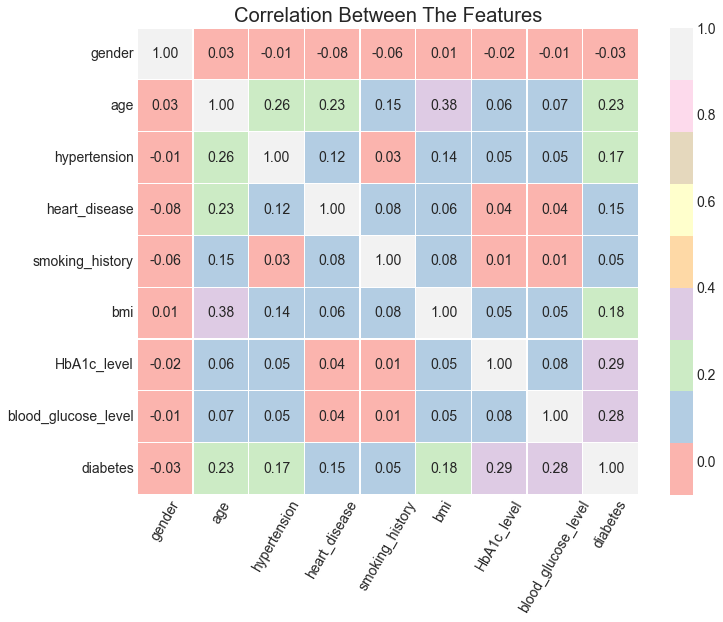

In [60]:
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Correlation Between The Features')
a = sns.heatmap(data.corr(), annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.set_yticklabels(a.get_yticklabels())
plt.show()

# Train Test Split

In [61]:
target = data['diabetes']
data.drop('diabetes', axis=1, inplace=True)

xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.3, random_state=42)



In [62]:
def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

# Feature Scaling Using StandardScaler

In [63]:
cols = xtrain.columns

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns=cols)
xtest = pd.DataFrame(xtest, columns=cols)


# Modeling

In [ ]:
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

classifiers = {
    'Logistic Regression': lr_model,
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for name, clf in classifiers.items():
    metrics = {
        'Accuracy': 0,
        'Precision': 0,
        'Recall': 0,
        'F1-Score': 0
    }

    for i, state in enumerate([10, 20, 30, 50, 100]):
        X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=state)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        metrics['Accuracy'] += accuracy_score(y_test, y_pred)
        metrics['Precision'] += precision_score(y_test, y_pred)
        metrics['Recall'] += recall_score(y_test, y_pred)
        metrics['F1-Score'] += f1_score(y_test, y_pred)

        print(f"{i+1} - Model: {name}; Acc: {accuracy_score(y_test, y_pred)}; "
              f"Prec: {precision_score(y_test, y_pred)}; Rec: {recall_score(y_test, y_pred)}; "
              f"F1: {f1_score(y_test, y_pred)}")

    # Calculate the mean of the metrics
    for metric in metrics:
        metrics[metric] /= 5
        performance_metrics[metric].append((name, metrics[metric]))

for metric, values in performance_metrics.items():
    print(f"{metric}:")
    for name, score in values:
        print(f"{name}: {score}")


# Accuracy Comparison

In [ ]:
names = [name for name, _ in performance_metrics['Accuracy']]
scores = [score for _, score in performance_metrics['Accuracy']]

plt.figure(figsize=(8, 6))
bars = plt.bar(names, scores, color='lightcoral')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy for Each Classifier')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.show()


**Confusion Matrix of Logistic Regression**

In [ ]:
param_lr = {'penalty': ['l1', 'l2', 'elasticnet']}
gridSearch_lr = GridSearchCV(lr_model, param_lr, cv=5, scoring='accuracy')
gridSearch_lr.fit(xtrain, ytrain)
Logistic = gridSearch_lr.best_estimator_
ypred_lr = Logistic.predict(xtest)
fig, ax_lr = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Logistic, xtest, ytest, ax=ax_lr, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.grid()



**Confusion Matrix of Decision Tree**

In [ ]:
param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(1, 10)]}

gridSearch = GridSearchCV(dt_model, param, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(xtrain, ytrain)
Tree = gridSearch.best_estimator_

fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Tree, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Decision Tree')
plt.grid()

**Confusion Matrix of KNN**

In [ ]:
param = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['unoform', 'distance']}

gridSearch = GridSearchCV(knn_model, param, cv=5, scoring='accuracy')
gridSearch.fit(xtrain, ytrain)
KNN = gridSearch.best_estimator_

fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(KNN, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of KNN')
plt.grid()

In [ ]:
parameter = {
    'criterion': ['gini', 'entropy']}

gridSearch = GridSearchCV(rf_model, parameter, cv=5, scoring='accuracy')
gridSearch.fit(xtrain, ytrain)
Random = gridSearch.best_estimator_

fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')
ConfusionMatrixDisplay.from_estimator(Random, xtest, ytest, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Random Forest')
plt.grid()